In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import imshow

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# in webcam CCORR_NORMED and SQDIFF_NORMED work best.

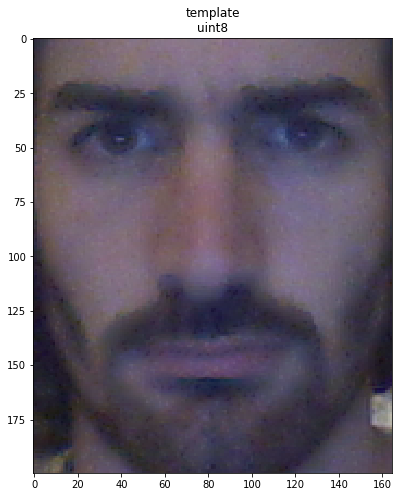

In [9]:
cap = cv2.VideoCapture(0)
img = cv2.imread('../face.png')
img = img[150:350, 210:375]
h, w = img.shape[:2]
imshow('template',img)
method = eval('cv2.TM_CCOEFF')
while(1):
    _, frame = cap.read()
    for i in (3,5):
        res = cv2.matchTemplate(img,frame, i)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if methods[i] in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(frame,top_left, bottom_right, 255, 2)
        cv2.imshow(methods[i],res)
    cv2.imshow('frame',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()